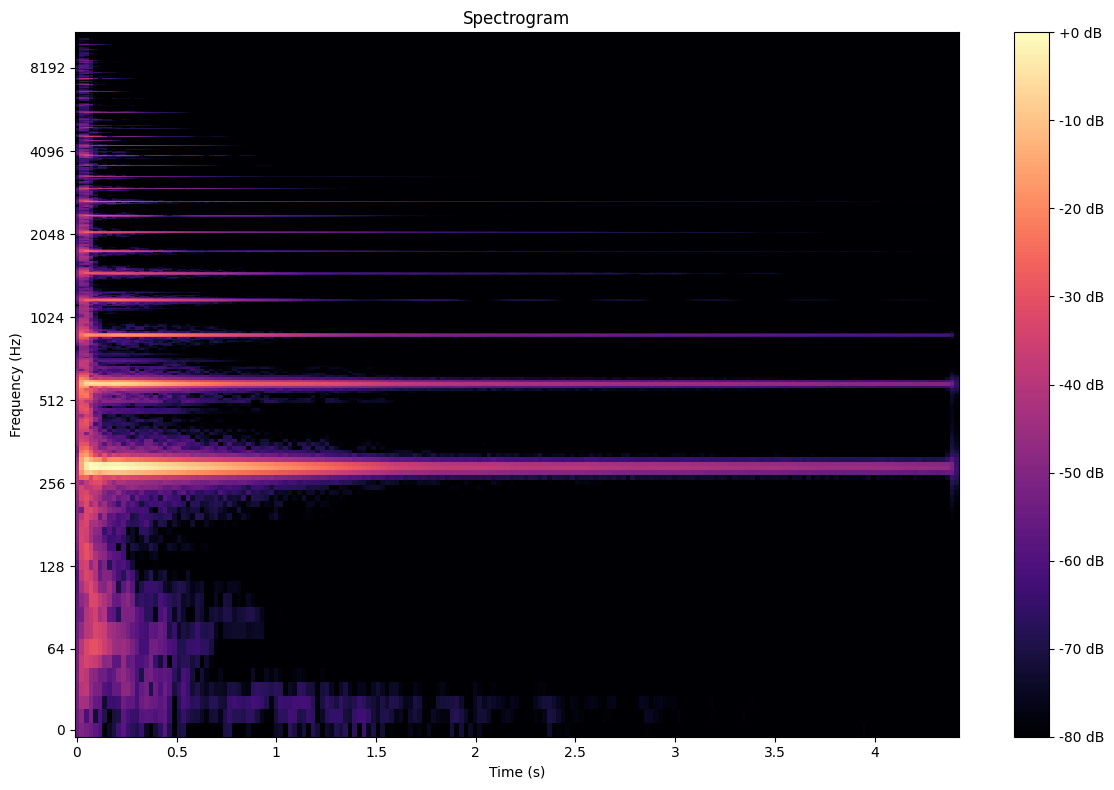

In [2]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt


def create_spectrogram(filename):
    # Load the audio file
    y, sr = librosa.load(filename)

    # Compute the spectrogram as the square of the complex magnitude of the STFT (Short-Time Fourier Transform)
    # You may also explore other parameters within the STFT, depending on your specific needs.
    D = np.abs(librosa.stft(y))**2
    S_db = librosa.power_to_db(D, ref=np.max)

    # Plotting the spectrogram and setting the labels and titles
    plt.figure(figsize=(12, 8))
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.tight_layout()
    plt.show()


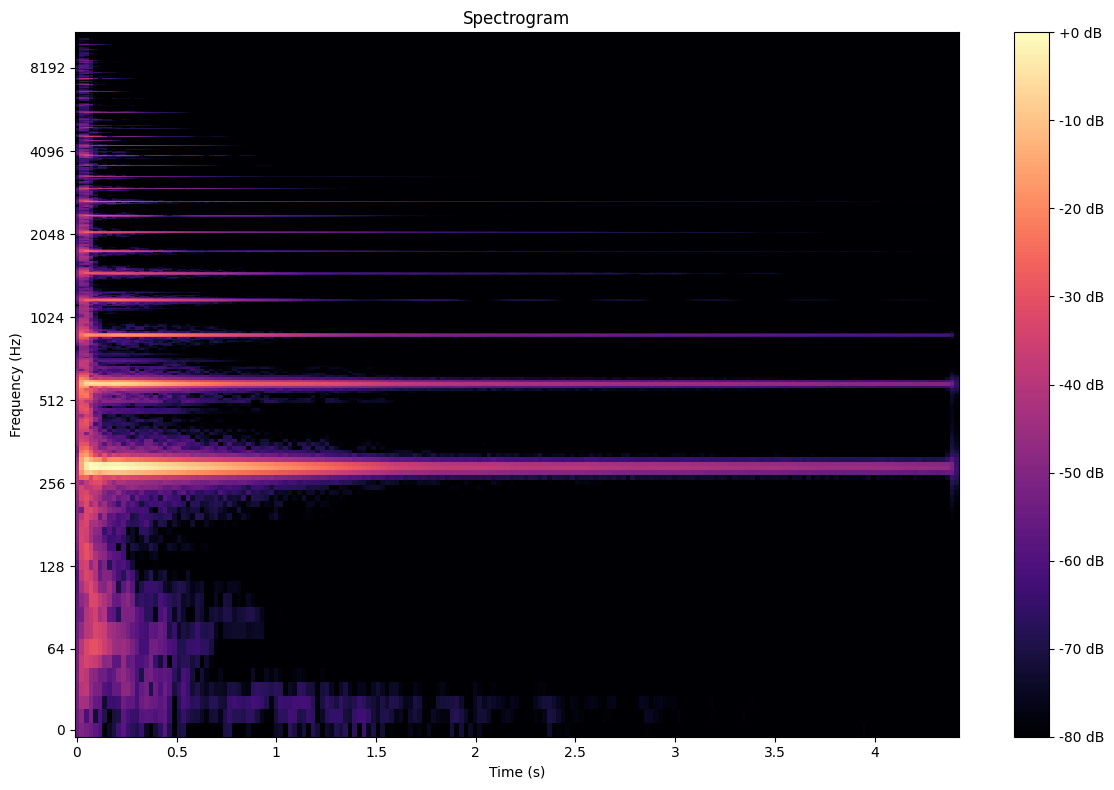

In [10]:
file = './data/D5.mp3'
create_spectrogram(file)

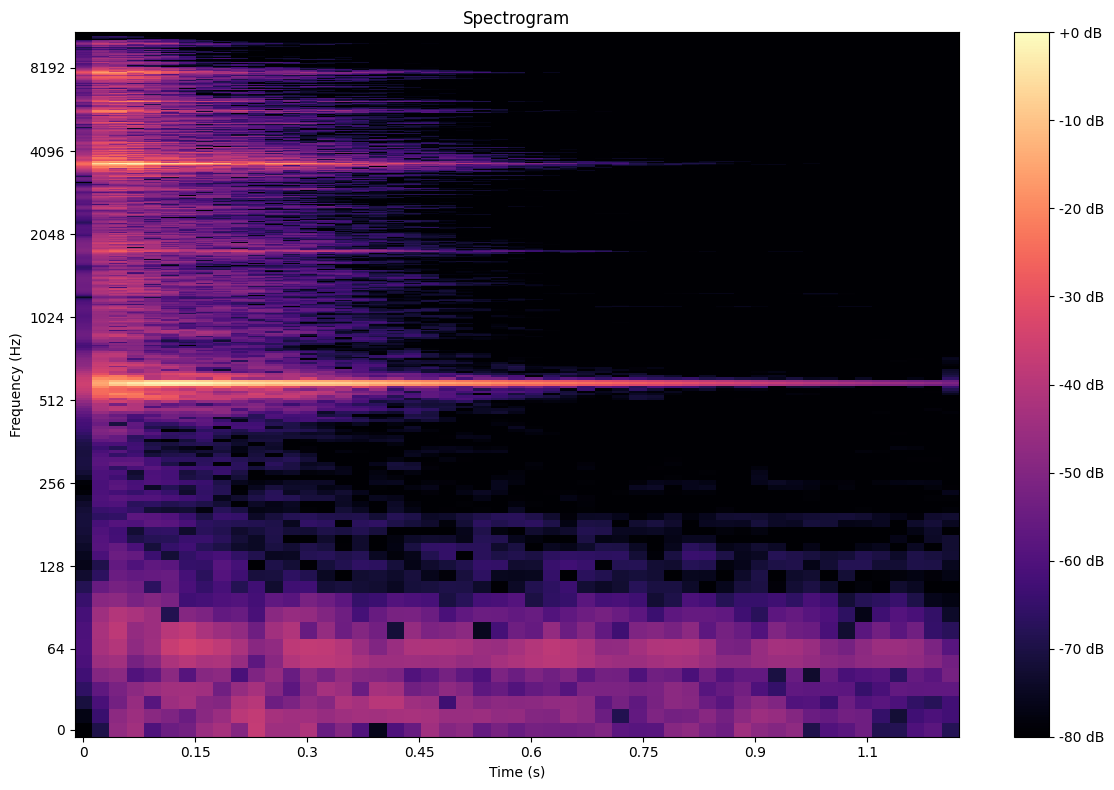

In [11]:
file = './data/D5_Xyl.mp3'
create_spectrogram(file)

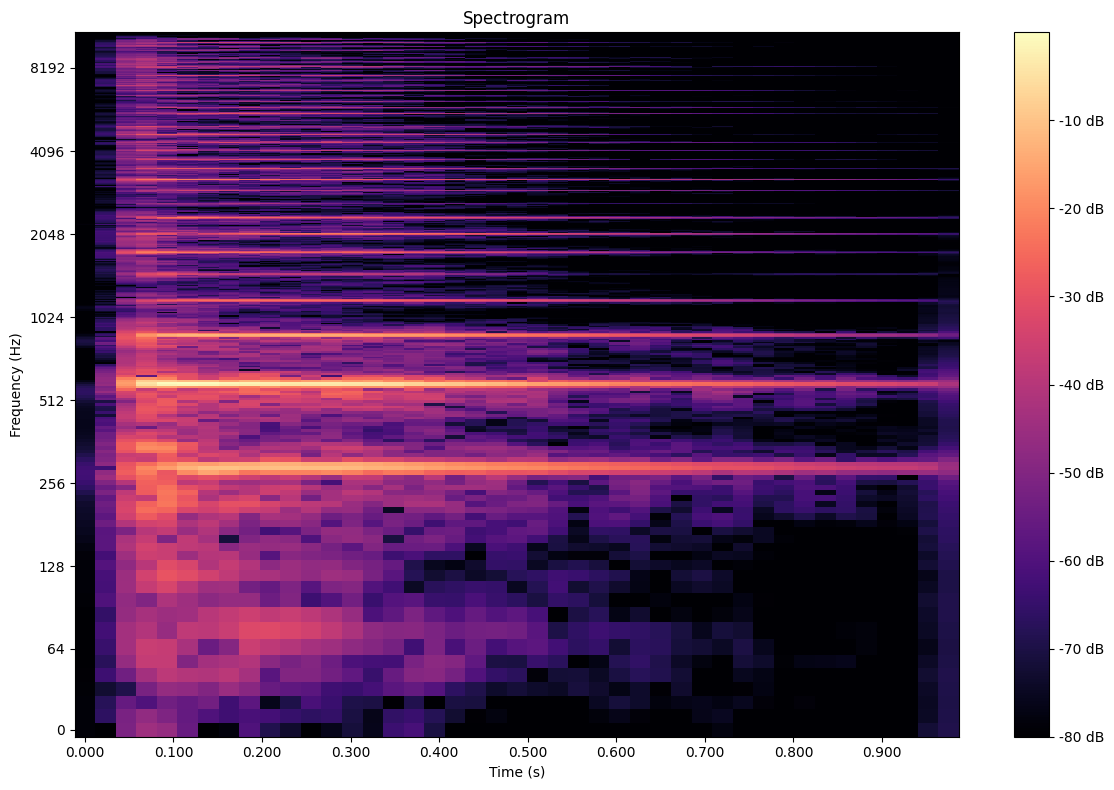

In [12]:
file = './data/D5_Harpsichord.mp3'
create_spectrogram(file)

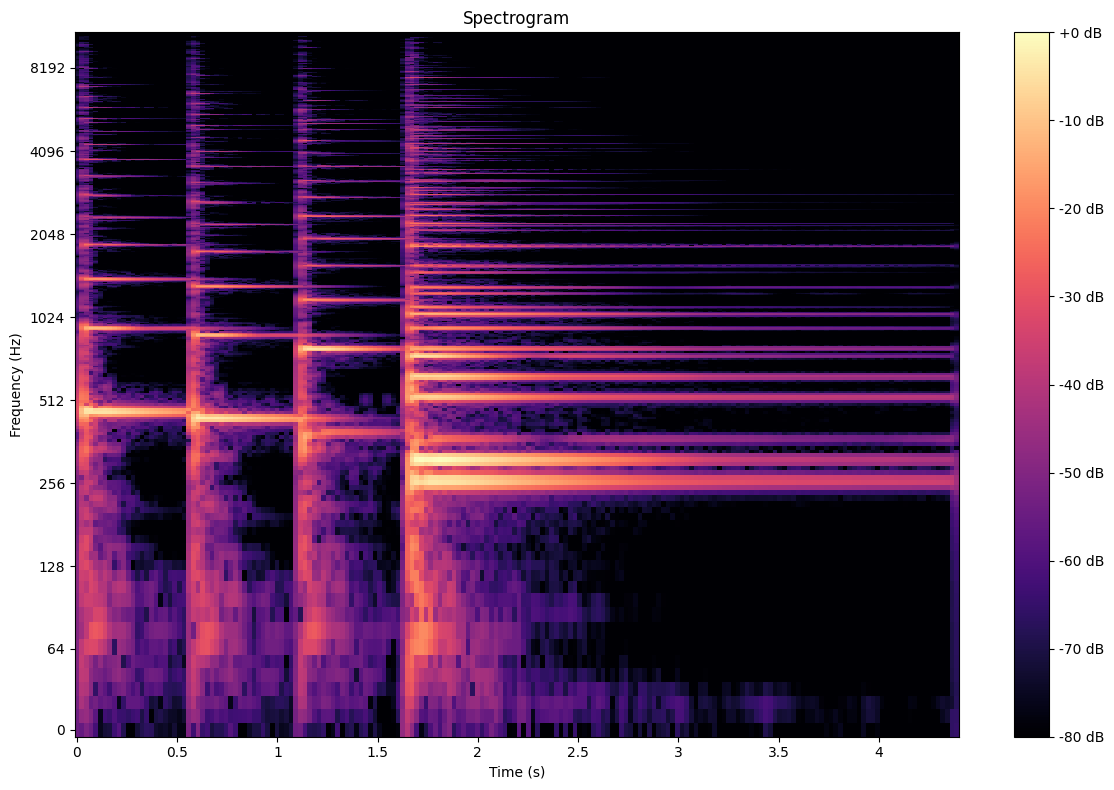

In [4]:

file = './data/Seq1.mp3'
create_spectrogram(file)

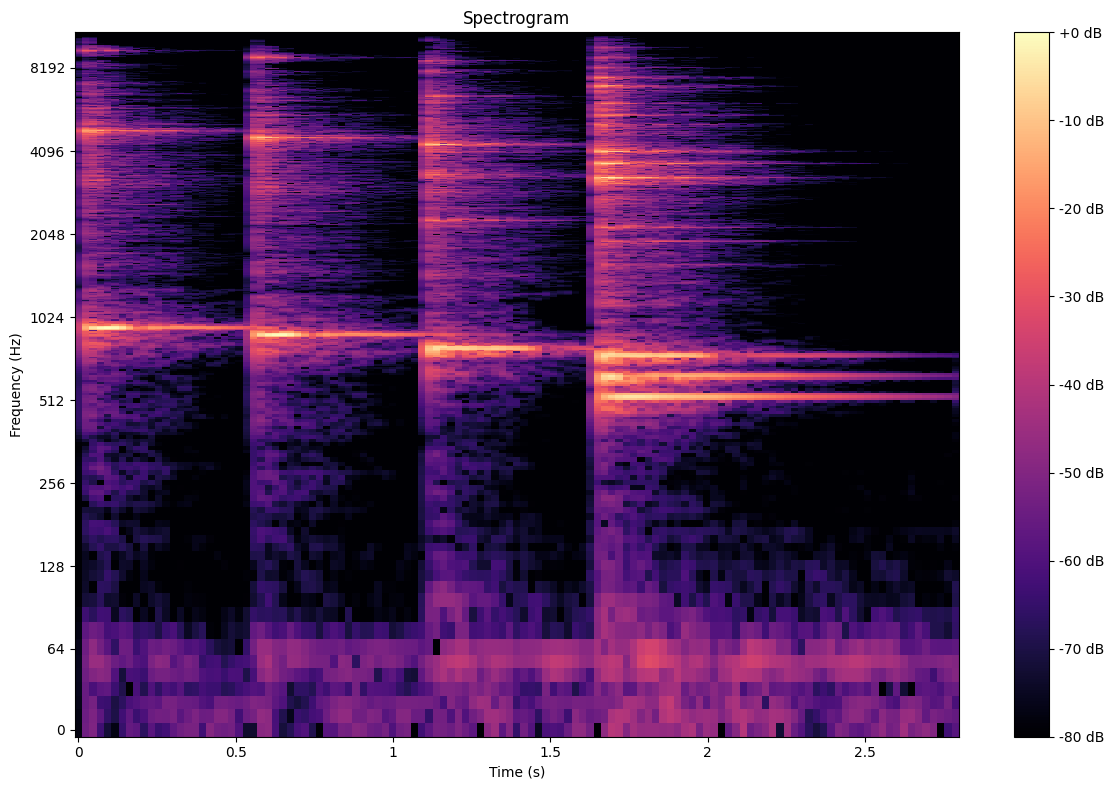

In [7]:

file = './data/Seq1_Xyl.mp3'
create_spectrogram(file)

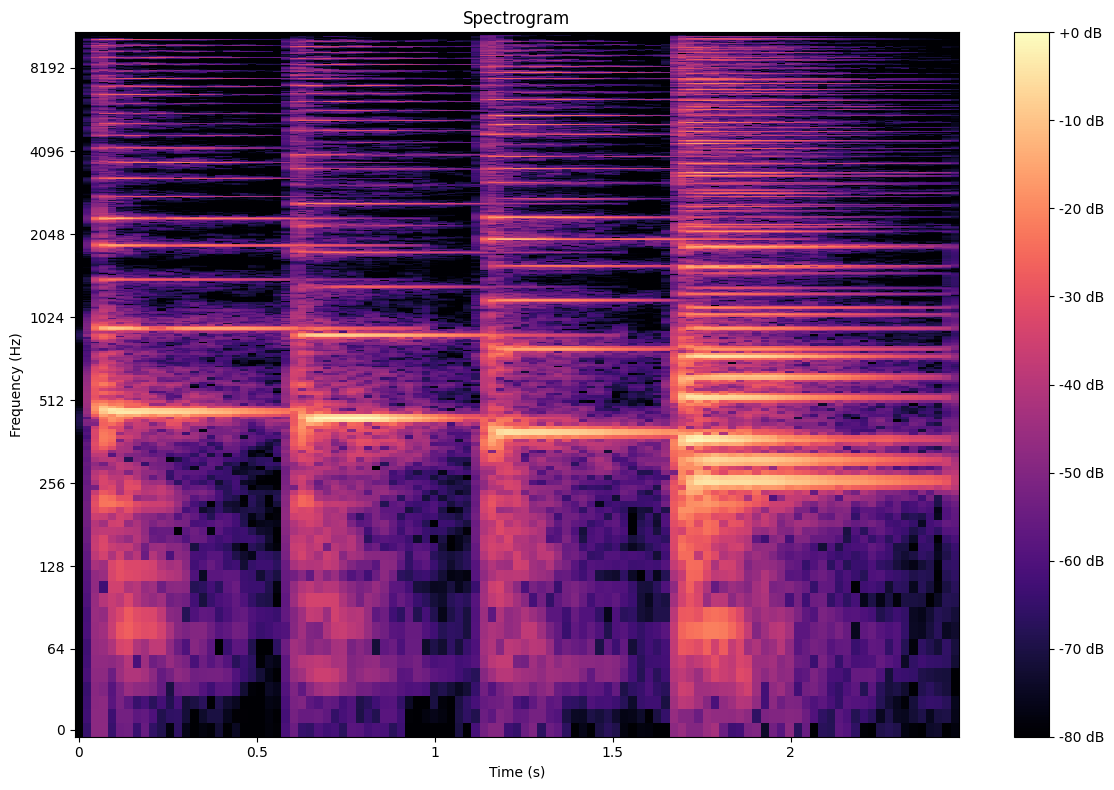

In [9]:
file = './data/Seq1_Harpsichord.mp3'
create_spectrogram(file)

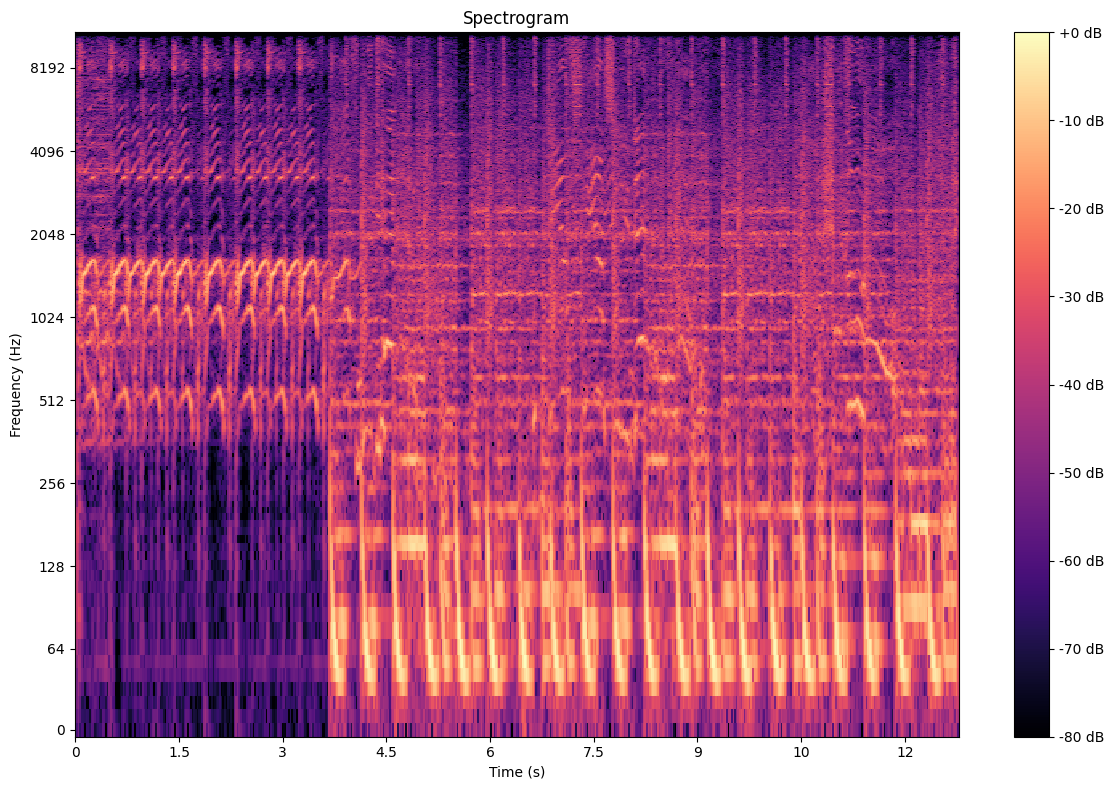

In [5]:

file = './data/Music1.mp3'
create_spectrogram(file)

In [ ]:

file = './data/museshort.mp3'
create_spectrogram(file)